In [96]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

In [195]:
### training dataset ###
train_data = pd.read_csv("/home/matz/Downloads/2015_Kyoto/Kyoto2016/2015/11/20151116.txt", sep = "\t", header = None)
train_data.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]
df1 = pd.read_csv("/home/matz/Downloads/2015_Kyoto/Kyoto2016/2015/11/20151127.txt", sep = "\t", header = None)
df1.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]
df2 = pd.read_csv("/home/matz/Downloads/2015_Kyoto/Kyoto2016/2015/11/20151103.txt", sep = "\t", header = None)
df2.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]
train_data = train_data.append(df1, ignore_index=True)
train_data = train_data.append(df2, ignore_index=True)
# slice dataset up to attack flag column, drop additional features
train_data = train_data.loc[:, :'attack_flag']

# drop software markers
train_data = train_data.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
train_data["attack_flag"].value_counts()

-1    898559
 1    203391
-2        47
Name: attack_flag, dtype: int64

In [196]:
### testing dataset ###
test_data = pd.read_csv("/home/matz/Downloads/2015_Kyoto/Kyoto2016/2015/12/20151219.txt", sep = "\t", header = None)
test_data.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]
df3 = pd.read_csv("/home/matz/Downloads/2015_Kyoto/Kyoto2016/2015/12/20151226.txt", sep = "\t", header = None)
df3.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]
df4 = pd.read_csv("/home/matz/Downloads/2015_Kyoto/Kyoto2016/2015/12/20151203.txt", sep = "\t", header = None)
df4.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]
test_data = test_data.append(df3, ignore_index=True)
test_data = test_data.append(df4, ignore_index=True)

# slice dataset up to attack flag column, drop additional features
test_data = test_data.loc[:, :'attack_flag']

# drop software markers
test_data = test_data.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
test_data["attack_flag"].value_counts()

-1    693031
 1    125365
-2        10
Name: attack_flag, dtype: int64

In [197]:
train_data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,Conn state,attack_flag
1101987,0.000380,other,0,0,0,0.0,0.0,0.50,0,0,0.0,0.0,0.0,REJ,-1
1101988,0.000000,other,0,0,0,0.0,0.0,0.50,1,32,1.0,1.0,1.0,S0,-1
1101989,0.000096,dns,68,106,0,0.0,0.0,0.00,0,1,0.0,0.0,0.0,SF,-1
1101990,0.000108,dns,47,202,1,1.0,0.0,0.00,0,2,0.0,0.0,0.0,SF,-1
1101991,0.000000,other,0,0,0,0.0,0.0,0.50,0,32,0.0,0.0,0.0,OTH,-1
1101992,0.000000,other,0,0,1,1.0,1.0,0.50,2,32,1.0,1.0,1.0,S0,-1
1101993,0.000000,other,0,0,0,0.0,0.0,0.50,0,0,0.0,0.0,0.0,S0,-1
1101994,0.333634,other,66,66,0,0.0,0.0,0.67,0,0,0.0,0.0,0.0,OTH,-1
1101995,0.000000,other,0,0,0,0.0,0.0,0.67,1,80,0.0,0.0,0.0,OTH,-1
1101996,0.000000,other,0,0,0,0.0,0.0,0.33,0,0,0.0,0.0,0.0,S0,-1


In [198]:
train_data.shape

(1101997, 15)

In [199]:
train_data.describe()

,conn len,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,attack_flag
count,1.101997e+06,1.101997e+06,1.101997e+06,1.101997e+06,1.101997e+06,1.101997e+06,1.101997e+06,1.101997e+06,1.101997e+06,1.101997e+06,1.101997e+06,1.101997e+06,1.101997e+06
mean,1.013465e+00,1.323366e+03,8.546159e+02,2.610959e+00,3.757462e-01,5.485746e-02,5.430519e-01,2.692402e+01,3.584893e+01,7.173588e-02,1.299528e-01,1.933339e-01,-6.309110e-01
std,4.886626e+01,1.037235e+06,5.169708e+05,6.881440e+00,4.801405e-01,2.201886e-01,4.409254e-01,3.814445e+01,4.164448e+01,2.539910e-01,3.292462e-01,3.859972e-01,7.759380e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
50%,3.360000e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.700000e-01,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
75%,1.144129e+00,4.700000e+01,9.900000e+01,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,5.700000e+01,8.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
max,5.093681e+04,1.059891e+09,5.425908e+08,1.000000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+02,1.000000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [200]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101997 entries, 0 to 1101996
Data columns (total 15 columns):
conn len                       1101997 non-null float64
service                        1101997 non-null object
src bytes                      1101997 non-null int64
dst bytes                      1101997 non-null int64
conn numb                      1101997 non-null int64
Same srv rate                  1101997 non-null float64
Serror rate                    1101997 non-null float64
Srv serror rate                1101997 non-null float64
Dst host count                 1101997 non-null int64
Dst host srv count             1101997 non-null int64
Dst host same src port rate    1101997 non-null float64
Dst host serror rate           1101997 non-null float64
Dst host srv serror rate       1101997 non-null float64
Conn state                     1101997 non-null object
attack_flag                    1101997 non-null int64
dtypes: float64(7), int64(6), object(2)
memory usage: 126.1+ 

In [201]:
train_data["Conn state"].value_counts(dropna=False)

S0        619040
SF        273684
RSTO       91272
OTH        67465
REJ        36892
RSTR        4604
RSTRH       3756
RSTOS0      2577
SHR         2373
S1           222
SH            69
S2            35
S3             8
Name: Conn state, dtype: int64

In [202]:
train_data["service"].value_counts(dropna=False)

other    716597
dns      257140
ssh      104084
sip       13866
smtp       5001
rdp        2690
snmp       2177
http        389
dhcp         45
ssl           8
Name: service, dtype: int64

In [203]:
### training dataset hot one encoding ###

# hot one encoding for service
train_data = pd.concat([train_data, pd.get_dummies(train_data["service"], prefix="is")], axis=1)
train_data.tail(10)

# hot one encoding for proto - commented due to reduced column number
# data = pd.concat([data, pd.get_dummies(data["proto"], prefix="is")], axis=1)
# data.tail(10)

# hot one encoding for conn state
train_data = pd.concat([train_data, pd.get_dummies(train_data["Conn state"], prefix="state")], axis=1)
train_data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_S2,state_S3,state_SF,state_SH,state_SHR
1101987,0.000380,other,0,0,0,0.0,0.0,0.50,0,0,...,0,0,0,0,0,0,0,0,0,0
1101988,0.000000,other,0,0,0,0.0,0.0,0.50,1,32,...,0,0,0,1,0,0,0,0,0,0
1101989,0.000096,dns,68,106,0,0.0,0.0,0.00,0,1,...,0,0,0,0,0,0,0,1,0,0
1101990,0.000108,dns,47,202,1,1.0,0.0,0.00,0,2,...,0,0,0,0,0,0,0,1,0,0
1101991,0.000000,other,0,0,0,0.0,0.0,0.50,0,32,...,0,0,0,0,0,0,0,0,0,0
1101992,0.000000,other,0,0,1,1.0,1.0,0.50,2,32,...,0,0,0,1,0,0,0,0,0,0
1101993,0.000000,other,0,0,0,0.0,0.0,0.50,0,0,...,0,0,0,1,0,0,0,0,0,0
1101994,0.333634,other,66,66,0,0.0,0.0,0.67,0,0,...,0,0,0,0,0,0,0,0,0,0
1101995,0.000000,other,0,0,0,0.0,0.0,0.67,1,80,...,0,0,0,0,0,0,0,0,0,0
1101996,0.000000,other,0,0,0,0.0,0.0,0.33,0,0,...,0,0,0,1,0,0,0,0,0,0


In [204]:
### testing dataset hot one encoding ###

# hot one encoding for service
test_data = pd.concat([test_data, pd.get_dummies(test_data["service"], prefix="is")], axis=1)
test_data.tail(10)

# hot one encoding for proto - commented due to reduced column number
# data = pd.concat([data, pd.get_dummies(data["proto"], prefix="is")], axis=1)
# data.tail(10)

# hot one encoding for conn state
test_data = pd.concat([test_data, pd.get_dummies(test_data["Conn state"], prefix="state")], axis=1)
test_data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_S2,state_S3,state_SF,state_SH,state_SHR
818396,0.0,other,0,0,0,0.0,0.0,1.0,1,1,...,0,0,0,1,0,0,0,0,0,0
818397,0.0,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
818398,0.0,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
818399,0.0,other,0,0,0,0.0,0.0,1.0,0,1,...,0,0,0,1,0,0,0,0,0,0
818400,0.0,other,0,0,0,0.0,0.0,1.0,0,1,...,0,0,0,1,0,0,0,0,0,0
818401,0.0,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
818402,0.0,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
818403,0.0,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
818404,0.0,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
818405,0.0,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [205]:
train_data.shape

(1101997, 38)

In [206]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101997 entries, 0 to 1101996
Data columns (total 38 columns):
conn len                       1101997 non-null float64
service                        1101997 non-null object
src bytes                      1101997 non-null int64
dst bytes                      1101997 non-null int64
conn numb                      1101997 non-null int64
Same srv rate                  1101997 non-null float64
Serror rate                    1101997 non-null float64
Srv serror rate                1101997 non-null float64
Dst host count                 1101997 non-null int64
Dst host srv count             1101997 non-null int64
Dst host same src port rate    1101997 non-null float64
Dst host serror rate           1101997 non-null float64
Dst host srv serror rate       1101997 non-null float64
Conn state                     1101997 non-null object
attack_flag                    1101997 non-null int64
is_dhcp                        1101997 non-null uint8
is_dns 

In [207]:
# check differences between datasets after hot one encoding

train_data.columns.difference(test_data.columns)
# print(train_data.columns.difference(test_data.columns)[0])
for c in train_data.columns.difference(test_data.columns):
    test_data[c] = 0
for c in test_data.columns.difference(train_data.columns):
    train_data[c] = 0


## Data visualization

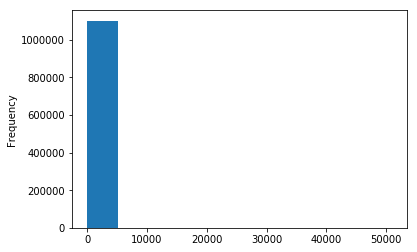

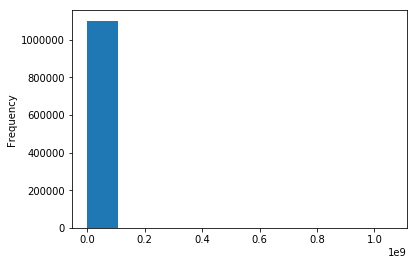

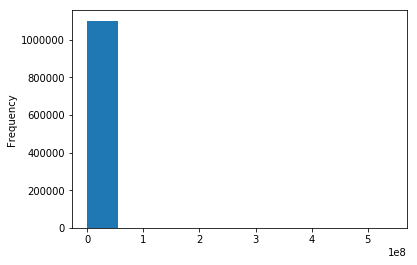

In [208]:
# hisotgrams
# data[data.column > 1000]
train_data['conn len'].plot('hist')
plt.show()
train_data['src bytes'].plot('hist')
plt.show()
train_data['dst bytes'].plot('hist')
plt.show()

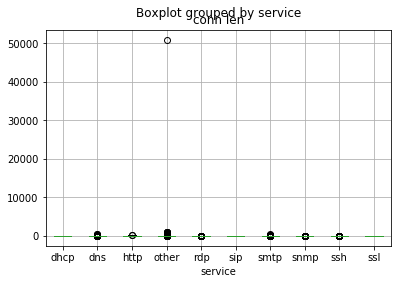

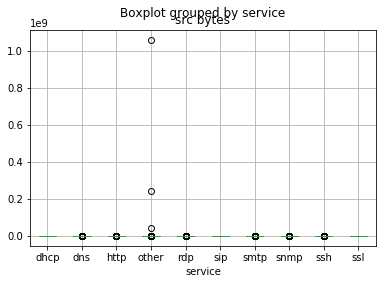

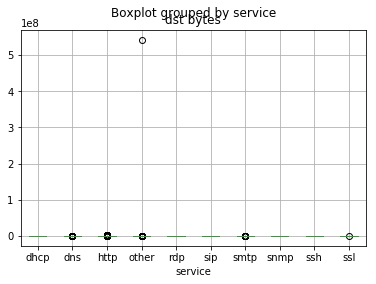

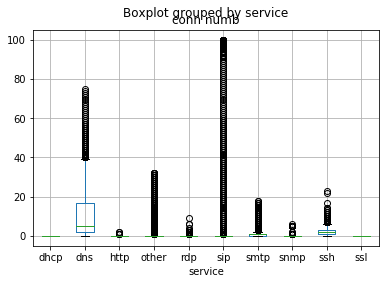

In [209]:
# boxplots
train_data.boxplot(column='conn len', by='service')
train_data.boxplot(column='src bytes', by='service')
train_data.boxplot(column='dst bytes', by='service')
train_data.boxplot(column='conn numb', by='service')

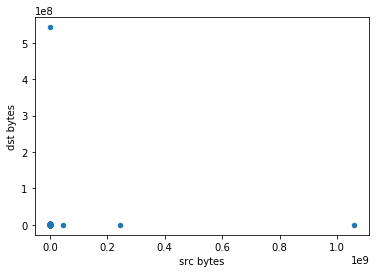

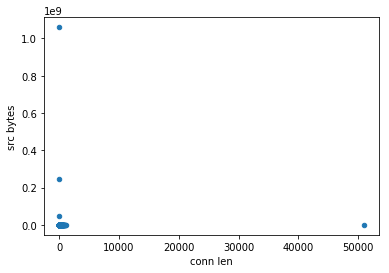

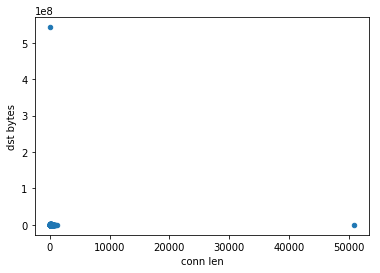

In [210]:
# scatter plots
train_data.plot.scatter(x='src bytes', y= 'dst bytes')
train_data.plot.scatter(x='conn len', y= 'src bytes')
train_data.plot.scatter(x='conn len', y= 'dst bytes')

In [211]:
### training dataset - drop categorical columns ####

train_data = train_data.drop(["service", "Conn state"], axis=1)

In [212]:
### testing dataset - drop categorical columns ####

test_data = test_data.drop(["service", "Conn state"], axis=1)

## First experiments with algorithms

In [213]:
train_data.shape

(1101997, 36)

In [214]:
### training dataset - make the dataset binary one ###
train_data.loc[:, "attack_flag"] = train_data.loc[:,"attack_flag"].replace(-2, -1)
train_data.loc[:, "attack_flag"] = train_data.loc[:, "attack_flag"] * -1

In [215]:
### testing dataset - make the dataset binary one ###
test_data.loc[:, "attack_flag"] = test_data.loc[:,"attack_flag"].replace(-2, -1)
test_data.loc[:, "attack_flag"] = test_data.loc[:, "attack_flag"] * -1

In [216]:
# plotting method definition

def plot_stats(stat, name):
    fig, ax = plt.subplots(figsize=(4, 4))    
    ax.bar(range(len(stat)), list(stat.values()), align='center')
    plt.xticks(range(len(stat)), list(stat.keys()), rotation=35)
    for a,b in enumerate(stat.items()):
        ax.text(a, b[1] + max(stat.values())/60 , str(round(b[1],5)), horizontalalignment ='center', verticalalignment='baseline')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(name + " of tested algorithms")
    plt.show()

In [219]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from collections import Counter

import matplotlib.pyplot as plt

sampled_train_data = train_data.sample(n=300000, random_state=1)
sampled_test_data = test_data.sample(n=300000, random_state=1)

X = sampled_train_data.loc[:, sampled_train_data.columns != 'attack_flag']
y = sampled_train_data.loc[:, sampled_train_data.columns == 'attack_flag'].values.ravel()
X_train, a, y_train, b = train_test_split(X, y, test_size=0.3)

X = sampled_test_data.loc[:, sampled_test_data.columns != 'attack_flag']
y = sampled_test_data.loc[:, sampled_test_data.columns == 'attack_flag'].values.ravel()
a, X_test, b, y_test = train_test_split(X, y, test_size=0.3)

seed = 12

print(Counter(y_test))
print(Counter(y_train))

# wykres po num_trees od 2-40 co 2 dla przykładu

num_trees = 35
kfold = KFold(n_splits=10, random_state=seed)

classifiers = {"AdaBoost":AdaBoostClassifier(n_estimators=num_trees, random_state=seed),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":RandomForestClassifier(n_estimators=36, max_depth=2, random_state=0)}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))



Counter({1: 76177, -1: 13823})
Counter({1: 171216, -1: 38784})
Algorithm: AdaBoost     Accuracy: 0.90588, F1-score: 0.94286, Precision: 0.96972, Recall: 0.91744, FPR: 0.15785
TN: 11641; FP: 2182; FN: 6289; TP: 69888

Algorithm: DecisionTree Accuracy: 0.87177, F1-score: 0.92525, Precision: 0.91318, Recall: 0.93765, FPR: 0.49128
TN: 7032; FP: 6791; FN: 4750; TP: 71427

Algorithm: NaiveBayes   Accuracy: 0.82168, F1-score: 0.88317, Precision: 0.99126, Recall: 0.79634, FPR: 0.03870
TN: 13288; FP: 535; FN: 15514; TP: 60663

Algorithm: RandomTree   Accuracy: 0.91441, F1-score: 0.94961, Precision: 0.94642, Recall: 0.95282, FPR: 0.29726
TN: 9714; FP: 4109; FN: 3594; TP: 72583

Algorithm: RandomForest Accuracy: 0.88880, F1-score: 0.93262, Precision: 0.95727, Recall: 0.90921, FPR: 0.22369
TN: 10731; FP: 3092; FN: 6916; TP: 69261



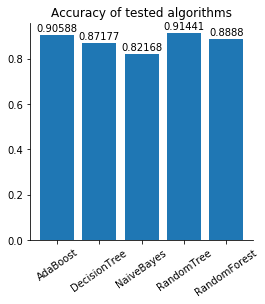

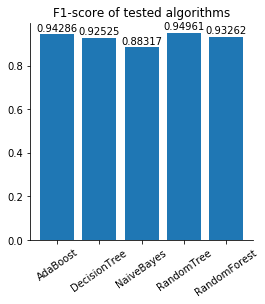

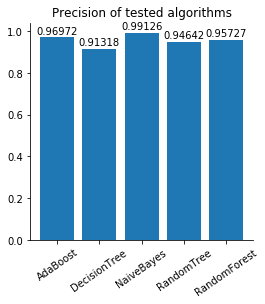

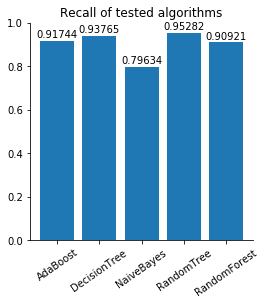

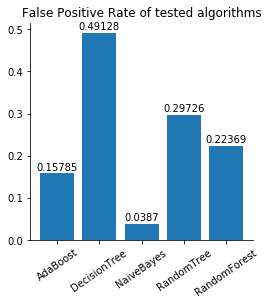

In [220]:
plot_stats(Acc, "Accuracy")
plot_stats(F1S, "F1-score")
plot_stats(Prec, "Precision")
plot_stats(Rec, "Recall")
plot_stats(FPR, "False Positive Rate")